In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR ='images/train'
TEST_DIR ='images/test'

In [4]:
def createdataframe(dir):
    image_paths =[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"Completed")
    return image_paths,labels

In [5]:
train =pd.DataFrame()
train['image'],train['label']=createdataframe(TRAIN_DIR)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test =pd.DataFrame()
test['image'],test['label']=createdataframe(TEST_DIR)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [8]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,grayscale=True)
        img =np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train=train_features/255.0
x_test=test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [17]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [18]:
model =Sequential()

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))




C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x=x_train,y=y_train,batch_size=128,epochs=1,validation_data=(x_test,y_test))

226/226 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.2364 - loss: 1.8281 - val_accuracy: 0.2584 - val_loss: 1.8046


In [22]:
import matplotlib.pyplot as plt
%matplot  lib inline

UsageError: Line magic function `%matplot` not found.


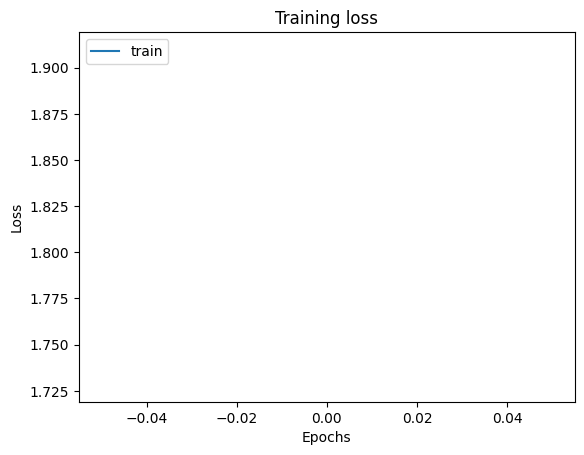

In [25]:
plt.plot(history.history['loss'])
plt.plot( label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train'],loc='upper left')
plt.show()

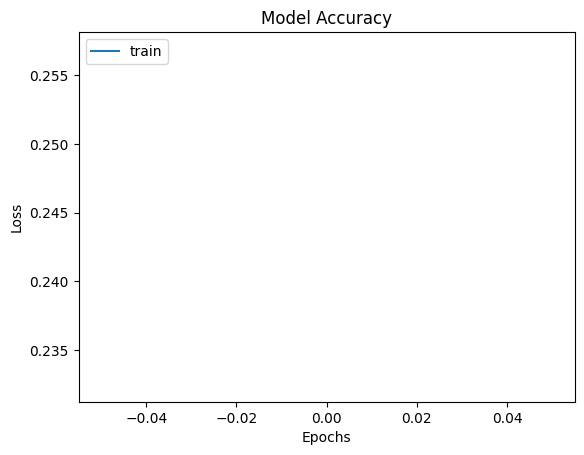

In [24]:
plt.plot(history.history['accuracy'])
plt.plot( label='Model Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train'],loc='upper left')
plt.show()

In [26]:
print("Number of samples in x_train:", x_train.shape[0])
print("Number of samples in y_train:", y_train.shape[0])

Number of samples in x_train: 28821
Number of samples in y_train: 28821


In [ ]:
   model_json=model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [27]:
from keras.models import model_from_json

In [28]:
try:
    json_file = open("emotiondetector.json", "r")
    model_json = json_file.read()
    json_file.close()
    model = model_from_json(model_json)
    model.load_weights("emotiondetector.h5")
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading model:")

Model loaded successfully.


In [29]:
label =['angry','disgust','fear','happy','neutral','sad','surprise']

In [30]:
def ef(image):
    img=load_img(image,grayscale=True)
    feature=np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [31]:
image='images/train/sad/603.jpg'
print("Original image is of Sad")
img = ef(image)
pred = model.predict(img)
pred_label=label[pred.argmax()]
print("Model Prediction is",pred_label)

Original image is of Sad


C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Model Prediction is sad


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Model Prediction is sad


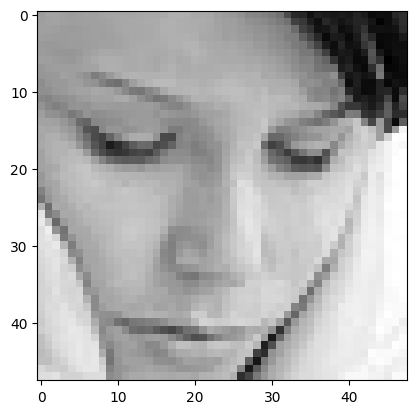

In [33]:
image='images/train/sad/42.jpg'
print("Original image is of Sad")
img = ef(image)
pred = model.predict(img)
pred_label=label[pred.argmax()]
print("Model Prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Model Prediction is sad


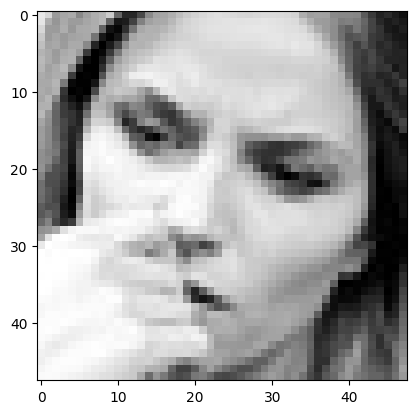

In [34]:
image='images/train/fear/2.jpg'
print("Original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label=label[pred.argmax()]
print("Model Prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Model Prediction is disgust


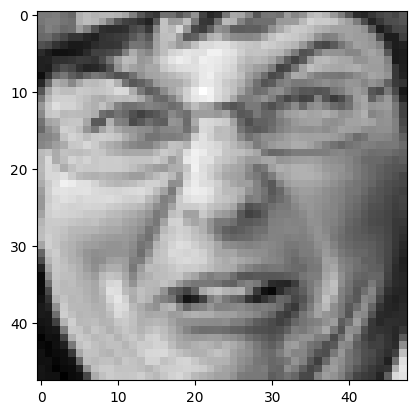

In [36]:
image='images/train/disgust/299.jpg'
print("Original image is of Sad")
img = ef(image)
pred = model.predict(img)
pred_label=label[pred.argmax()]
print("Model Prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Model Prediction is happy


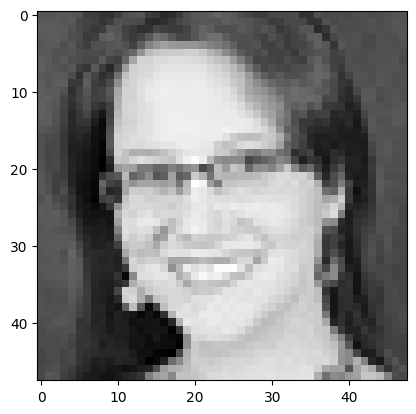

In [37]:
image='images/train/happy/7.jpg'
print("Original image is of Happy")
img = ef(image)
pred = model.predict(img)
pred_label=label[pred.argmax()]
print("Model Prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Model Prediction is surprise


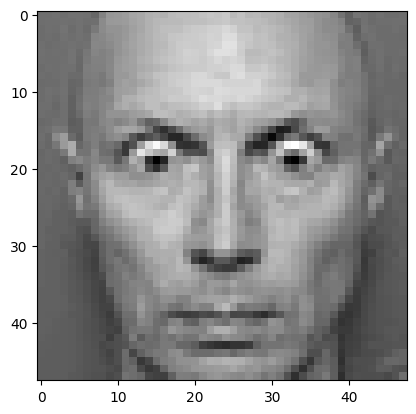

In [38]:
image='images/train/surprise/15.jpg'
print("Original image is of Surprise")
img = ef(image)
pred = model.predict(img)
pred_label=label[pred.argmax()]
print("Model Prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the model architecture and weights
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("Emotiondetector.h5")

# Load the Haar cascade for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Start the webcam
webcam = cv2.VideoCapture(0)
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    # Capture frame-by-frame
    ret, im = webcam.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (p, q, r, s) in faces:
        face = gray[q:q + s, p:p + r]
        cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 2)
        face = cv2.resize(face, (48, 48))
        img = extract_features(face)
        pred = model.predict(img)
        prediction_label = labels[pred.argmax()]
        cv2.putText(im, '%s' % (prediction_label), (p, q - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255), 1)

    # Display the resulting frame
    cv2.imshow("Output", im)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture and close windows
webcam.release()
cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━